In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()


#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

170500096/170498071 [==============================] - 5s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
# network

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [4]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])
 
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 8s 203us/step - loss: 1.7994 - acc: 0.3815 - val_loss: 1.3918 - val_acc: 0.5203
Epoch 2/20
40000/40000 [==============================] - 6s 151us/step - loss: 1.3697 - acc: 0.5141 - val_loss: 1.3288 - val_acc: 0.5167
Epoch 3/20
40000/40000 [==============================] - 6s 148us/step - loss: 1.2318 - acc: 0.5652 - val_loss: 1.2455 - val_acc: 0.5565
Epoch 4/20
40000/40000 [==============================] - 6s 149us/step - loss: 1.1496 - acc: 0.5949 - val_loss: 1.1680 - val_acc: 0.5860
Epoch 5/20
40000/40000 [==============================] - 6s 148us/step - loss: 1.0770 - acc: 0.6219 - val_loss: 1.1576 - val_acc: 0.5972
Epoch 6/20
40000/40000 [==============================] - 6s 147us/step - loss: 1.0215 - acc: 0.6424 - val_loss: 1.1863 - val_acc: 0.5922
Epoch 7/20
40000/40000 [==============================] - 6s 149us/step - loss: 0.9701 - acc: 0.6601 - val_loss: 1.0944 - 

In [5]:
print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Testing...
10000/10000 [==============================] - 1s 56us/step

Test score: 1.1188933227539062
Test accuracy: 0.6482


In [0]:
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


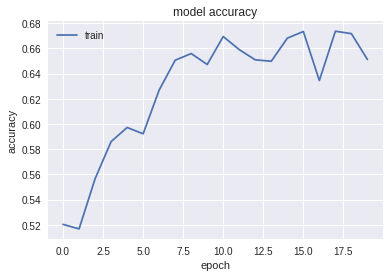

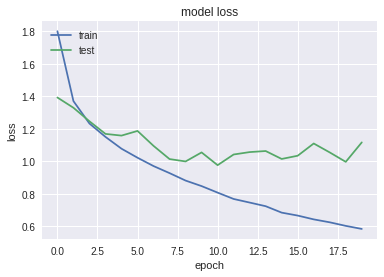

In [7]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()